<a href="https://colab.research.google.com/github/feniltailor22/Machine_Learning-and-Deep_Learning/blob/main/Denoising_MNIST_dataset_using_Autoencoder_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

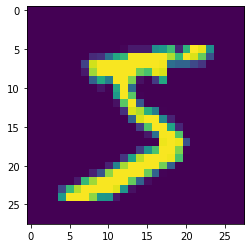

In [7]:
plt.imshow(x_train[0])

In [8]:
#normalizing dataset

In [9]:
x_train= x_train.astype(dtype='float32')/255.
x_test= x_test.astype(dtype='float32')/255.

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

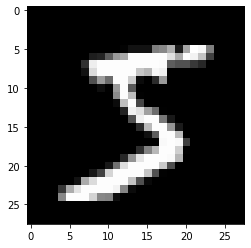

In [11]:
plt.imshow(x_train[0], cmap='gray')

In [12]:
x_train= np.reshape(a=x_train, newshape=(len(x_train), 28, 28, 1))
x_test= np.reshape(a=x_test, newshape=(len(x_test), 28, 28, 1))

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test.shape

(10000, 28, 28, 1)

In [15]:
#Adding some random noise from normal distribution with mean=0 and std dev=1
noise_factor=0.5
x_train_noisy= x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) #loc=mean, scale= std dev 
x_test_noisy= x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)  

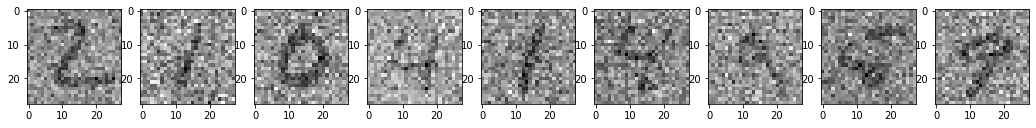

In [16]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [17]:
#Clipping all the values between 0 and 1
#Given an interval, values outside the interval are clipped to the interval edges. 
#For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

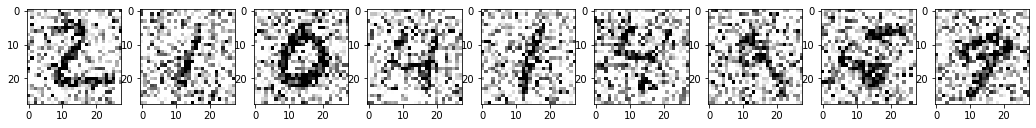

In [18]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense

In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [21]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 8s 24ms/step - loss: 0.0527 - val_loss: 0.0398
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0364 - val_loss: 0.0332
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0319 - val_loss: 0.0299
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0293 - val_loss: 0.0279
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0275 - val_loss: 0.0262
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0260 - val_loss: 0.0251
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0249 - val_loss: 0.0241
Epoch 8/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0241 - val_loss: 0.0236
Epoch 9/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0235 - val_loss: 0.0227
Epoch 10/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0229 - val_lo

In [22]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0223


0.02227974310517311

In [23]:
no_noise_img = model.predict(x_test_noisy) #reconstruct x_test_noisy with autoencoder  

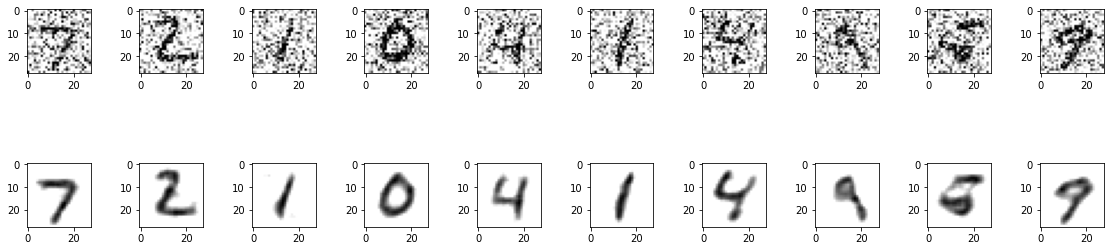

In [24]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()